In [ ]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

In [ ]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. All changes under this directory will be kept even after reset. Please clean unnecessary files in time to speed up environment loading.
!ls /home/aistudio/work

In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, you need to use the persistence path as the following:
!mkdir /home/aistudio/external-libraries
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

In [ ]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可:
# Also add the following code, so that every time the environment (kernel) starts, just run the following code:
import sys
sys.path.append('/home/aistudio/external-libraries')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import tensorflow.keras.backend as K
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import os
import keras
"""
神经网络
"""
## 读取神经网络模型数据

Train_NN_data = pd.read_csv(tree_data_path+'train_nn.csv', sep=' ')
Test_NN_data = pd.read_csv(tree_data_path+'test_nn.csv', sep=' ')

numerical_cols = Train_NN_data.columns
feature_cols = [col for col in numerical_cols if col not in ['price','SaleID']]
## 提前特征列，标签列构造训练样本和测试样本
X_data = Train_NN_data[feature_cols]
X_test = Test_NN_data[feature_cols]


x = np.array(X_data)
y = np.array(Train_NN_data['price'])
x_test = np.array(X_test)

# callbacks 是在训练过程中进行监听的，因此是在fit函数中对callbacks进行添加
# 定义一个callbacks的数组，然后在fit函数中将callbacks的数组当作参数传进去
logdir = './callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
logdir = os.path.join("callbacks") # 好像只是在window上要添加这行，否则出错

output_model_file = os.path.join(logdir,"fashion_mnist_model.h5")  # 输出的model文件

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]


kfolder = KFold(n_splits=5, shuffle=True, random_state=2018)
oof_nn = np.zeros(len(x))
predictions_nn = np.zeros(len(x_test))
predictions_train_nn = np.zeros(len(x))
kfold = kfolder.split(x, y)
fold_ = 0
for train_index, vali_index in kfold:
    k_x_train = x[train_index]
    k_y_train = y[train_index]
    k_x_vali = x[vali_index]
    k_y_vali = y[vali_index]

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)))
    model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)))
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)))
    model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)))
    model.add(tf.keras.layers.Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.02)))

    model.compile(loss='mean_absolute_error',
                    optimizer=tf.keras.optimizers.Adam(),
                  metrics=['mae'])

    model.fit(k_x_train,k_y_train,batch_size =512,epochs=2000,validation_data=(k_x_vali, k_y_vali), callbacks=callbacks)#callbacks=callbacks,
    oof_nn[vali_index] = model.predict(k_x_vali).reshape((model.predict(k_x_vali).shape[0],))
    predictions_nn += model.predict(x_test).reshape((model.predict(x_test).shape[0],)) / kfolder.n_splits
    predictions_train_nn += model.predict(x).reshape((model.predict(x).shape[0],)) / kfolder.n_splits

print("NN score: {:<8.8f}".format(mean_absolute_error(oof_nn, y)))

output_path = path + '/Colab Notebooks/'
# 测试集输出
predictions = predictions_nn
predictions[predictions < 0] = 0
sub = pd.DataFrame()
sub['SaleID'] = Test_NN_data.SaleID
sub['price'] = predictions
sub.to_csv(output_path+'nn_test.csv', index=False)

# 验证集输出
oof_nn[oof_nn < 0] = 0
sub = pd.DataFrame()
sub['SaleID'] = Train_NN_data.SaleID
sub['price'] = oof_nn
sub.to_csv(output_path+'nn_train.csv', index=False)

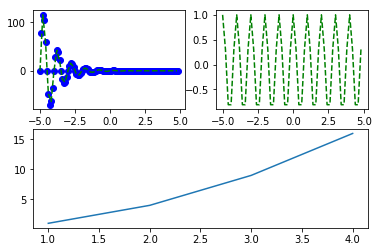

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

def f(t):
    return np.exp(-t) * np.sin(2 * np.pi * t)


if __name__ == '__main__':
    t1 = np.arange(-5, 5, 0.1)
    t2 = np.arange(-5, 5, 0.2)
    plt.figure()
    plt.subplot(221)
    plt.plot(t1, f(t1), 'bo', t2, f(t2), 'g--')
    plt.subplot(222)
    plt.plot(t2, np.cos(2 * np.pi * t2), 'g--')
    plt.subplot(212)
    plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
    plt.show()

In [ ]:
import gc
import pandas as pd
# 用户行为，使用format1进行加载


# user_log = pd.read_csv('./data_format1/user_log_format1.csv', dtype={'time_stamp':'str'})
# user_info = pd.read_csv('./data_format1/user_info_format1.csv')
# train_data1 = pd.read_csv('./data_format1/train_format1.csv')
# submission = pd.read_csv('./data_format1/test_format1.csv')


# 加载小样本
user_log = pd.read_csv('./sample_user_log.csv', dtype={'time_stamp':'str'})
user_info = pd.read_csv('./sample_user_info.csv')
train_data = pd.read_csv('./train.csv')


submission = pd.read_csv('./test.csv')
# train_data = pd.read_csv('./data_format2/train_format2.csv')

train_data['origin'] = 'train'
submission['origin'] = 'test'
matrix = pd.concat([train_data, submission], ignore_index=True, sort=False)
#print(matrix)

matrix.drop(['prob'], axis=1, inplace=True)
# 连接user_info表，通过user_id关联
matrix = matrix.merge(user_info, on='user_id', how='left')
# 使用merchant_id（原列名seller_id）
user_log.rename(columns={'seller_id':'merchant_id'}, inplace=True)
# 格式化
user_log['user_id'] = user_log['user_id'].astype('int32')
user_log['merchant_id'] = user_log['merchant_id'].astype('int32')
user_log['item_id'] = user_log['item_id'].astype('int32')
user_log['cat_id'] = user_log['cat_id'].astype('int32')
user_log['brand_id'].fillna(0, inplace=True)
user_log['brand_id'] = user_log['brand_id'].astype('int32')
user_log['time_stamp'] = pd.to_datetime(user_log['time_stamp'], format='%H%M')
# 1 for <18; 2 for [18,24]; 3 for [25,29]; 4 for [30,34]; 5 for [35,39]; 6 for [40,49]; 7 and 8 for >= 50; 0 and NULL for unknown
matrix['age_range'].fillna(0, inplace=True)
# 0:female, 1:male, 2:unknown
matrix['gender'].fillna(2, inplace=True)
matrix['age_range'] = matrix['age_range'].astype('int8')
matrix['gender'] = matrix['gender'].astype('int8')
matrix['label'] = matrix['label'].astype('str')
matrix['user_id'] = matrix['user_id'].astype('int32')
matrix['merchant_id'] = matrix['merchant_id'].astype('int32')
# del user_info, train_data1
gc.collect()
print(matrix)

# User特征处理
groups = user_log.groupby(['user_id'])
# 用户交互行为数量 u1
temp = groups.size().reset_index().rename(columns={0:'u1'})
matrix = matrix.merge(temp, on='user_id', how='left')
# 使用agg 基于列的聚合操作，统计唯一值的个数 item_id, cat_id, merchant_id, brand_id
#temp = groups['item_id', 'cat_id', 'merchant_id', 'brand_id'].nunique().reset_index().rename(columns={'item_id':'u2', 'cat_id':'u3', 'merchant_id':'u4', 'brand_id':'u5'})
# 对于每个user_id 不重复的item_id的数量 => u2
temp = groups['item_id'].agg([('u2', 'nunique')]).reset_index()
matrix = matrix.merge(temp, on='user_id', how='left')
# 对于每个user_id 不重复的cat_id的数量 => u3
temp = groups['cat_id'].agg([('u3', 'nunique')]).reset_index()
matrix = matrix.merge(temp, on='user_id', how='left')
temp = groups['merchant_id'].agg([('u4', 'nunique')]).reset_index()
matrix = matrix.merge(temp, on='user_id', how='left')
temp = groups['brand_id'].agg([('u5', 'nunique')]).reset_index()
matrix = matrix.merge(temp, on='user_id', how='left')

# 时间间隔特征 u6 按照小时
# 对于每个user_id 计算time_stamp的最小时间 => F_time, 最大时间max => L_time
temp = groups['time_stamp'].agg([('F_time', 'min'), ('L_time', 'max')]).reset_index()
temp['u6'] = (temp['L_time'] - temp['F_time']).dt.seconds/3600
matrix = matrix.merge(temp[['user_id', 'u6']], on='user_id', how='left')
# 统计操作类型为0，1，2，3的个数
temp = groups['action_type'].value_counts().unstack().reset_index().rename(columns={0:'u7', 1:'u8', 2:'u9', 3:'u10'})
matrix = matrix.merge(temp, on='user_id', how='left')
#print(matrix)

# 商家特征处理
groups = user_log.groupby(['merchant_id'])
# 商家被交互行为数量 m1
temp = groups.size().reset_index().rename(columns={0:'m1'})
matrix = matrix.merge(temp, on='merchant_id', how='left')
# 统计商家被交互的user_id, item_id, cat_id, brand_id 唯一值
temp = groups['user_id', 'item_id', 'cat_id', 'brand_id'].nunique().reset_index().rename(columns={'user_id':'m2', 'item_id':'m3', 'cat_id':'m4', 'brand_id':'m5'})
matrix = matrix.merge(temp, on='merchant_id', how='left')
# 统计商家被交互的action_type 唯一值
temp = groups['action_type'].value_counts().unstack().reset_index().rename(columns={0:'m6', 1:'m7', 2:'m8', 3:'m9'})
matrix = matrix.merge(temp, on='merchant_id', how='left')
# 按照merchant_id 统计随机负采样的个数
temp = train_data[train_data['label']==-1].groupby(['merchant_id']).size().reset_index().rename(columns={0:'m10'})
matrix = matrix.merge(temp, on='merchant_id', how='left')
#print(matrix)

# 按照user_id, merchant_id分组
groups = user_log.groupby(['user_id', 'merchant_id'])
temp = groups.size().reset_index().rename(columns={0:'um1'}) #统计行为个数
matrix = matrix.merge(temp, on=['user_id', 'merchant_id'], how='left')
temp = groups['item_id', 'cat_id', 'brand_id'].nunique().reset_index().rename(columns={'item_id':'um2', 'cat_id':'um3', 'brand_id':'um4'}) #统计item_id, cat_id, brand_id唯一个数
matrix = matrix.merge(temp, on=['user_id', 'merchant_id'], how='left')
temp = groups['action_type'].value_counts().unstack().reset_index().rename(columns={0:'um5', 1:'um6', 2:'um7', 3:'um8'})#统计不同action_type唯一个数
matrix = matrix.merge(temp, on=['user_id', 'merchant_id'], how='left')
temp = groups['time_stamp'].agg([('first', 'min'), ('last', 'max')]).reset_index()
temp['um9'] = (temp['last'] - temp['first']).dt.seconds/3600
temp.drop(['first', 'last'], axis=1, inplace=True)
matrix = matrix.merge(temp, on=['user_id', 'merchant_id'], how='left') #统计时间间隔
#print(matrix)

#用户购买点击比
matrix['r1'] = matrix['u9']/matrix['u7'] 
#商家购买点击比
matrix['r2'] = matrix['m8']/matrix['m6'] 
#不同用户不同商家购买点击比
matrix['r3'] = matrix['um7']/matrix['um5']
matrix.fillna(0, inplace=True)
# # 修改age_range字段名称为 age_0, age_1, age_2... age_8
temp = pd.get_dummies(matrix['age_range'], prefix='age')
matrix = pd.concat([matrix, temp], axis=1)
temp = pd.get_dummies(matrix['gender'], prefix='g')
matrix = pd.concat([matrix, temp], axis=1)
matrix.drop(['age_range', 'gender'], axis=1, inplace=True)
print(matrix)

# 分割训练数据和测试数据
train_data = matrix[matrix['origin'] == 'train'].drop(['origin'], axis=1)
test_data = matrix[matrix['origin'] == 'test'].drop(['label', 'origin'], axis=1)
train_X, train_y = train_data.drop(['label'], axis=1), train_data['label']
del temp, matrix
# gc.collect()

       user_id  merchant_id label origin  age_range  gender
0       365952         1203   0.0  train          0       1
1        42624          946   0.0  train          2       0
2       240000         2278   0.0  train          3       0
3       177792          951   0.0  train          0       1
4       322944         1892   0.0  train          7       0
5       127104         4048   1.0  train          6       1
6       324480         2891   1.0  train          4       0
7         1920         4015   0.0  train          5       0
8        69504         2066   0.0  train          3       0
9       147072          740   0.0  train          2       1
10       20352         4549   0.0  train          3       1
11      152448         3623   0.0  train          3       0
12      153984         2102   0.0  train          3       0
13      153984         4044   0.0  train          3       0
14       89472         2721   0.0  train          6       0
15      352896         2537   0.0  train

In [11]:
# 使用机器学习工具
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
import xgboost as xgb
# 将训练集进行切分，20%用于验证
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_y, test_size=.2)

# 使用XGBoost
model = xgb.XGBClassifier(
    max_depth=25,
    n_estimators=10000,
    min_child_weight=300, 
    colsample_bytree=0.8, 
    subsample=0.8, 
    eta=0.3,    
    seed=42    
)
model.fit(
    X_train, y_train,
    eval_metric='auc', eval_set=[(X_train, y_train), (X_valid, y_valid)],
    verbose=True,
    #早停法，如果auc在10epoch没有进步就stop
    early_stopping_rounds=20
)


model.fit(X_train, y_train)

[0]	validation_0-auc:0.59420	validation_1-auc:0.59550
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.61112	validation_1-auc:0.62179
[2]	validation_0-auc:0.62626	validation_1-auc:0.60952
[3]	validation_0-auc:0.62750	validation_1-auc:0.61283
[4]	validation_0-auc:0.62720	validation_1-auc:0.60950
[5]	validation_0-auc:0.62720	validation_1-auc:0.61129
[6]	validation_0-auc:0.63049	validation_1-auc:0.61722
[7]	validation_0-auc:0.62969	validation_1-auc:0.62101
[8]	validation_0-auc:0.62732	validation_1-auc:0.61918
[9]	validation_0-auc:0.62632	validation_1-auc:0.61918
[10]	validation_0-auc:0.62686	validation_1-auc:0.62196
[11]	validation_0-auc:0.62509	validation_1-auc:0.62017
[12]	validation_0-auc:0.62524	validation_1-auc:0.62176
[13]	validation_0-auc:0.62403	validation_1-auc:0.62155
[14]	validation_0-auc:0.62380	validation_1-auc:0.61997
[15]	validation_0-auc:0.6254

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 